## Geometric and intensity transformations

C:\Users\mansi\AppData\Local\Temp\ipykernel_25228\598176027.py:11: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()  # retrieve a grayscale image


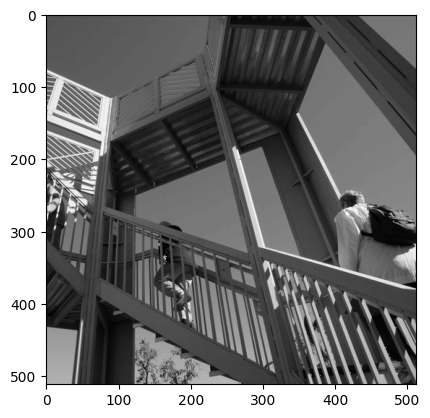

In [66]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

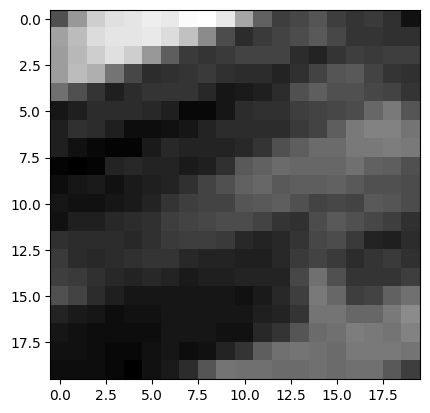

In [67]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [68]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

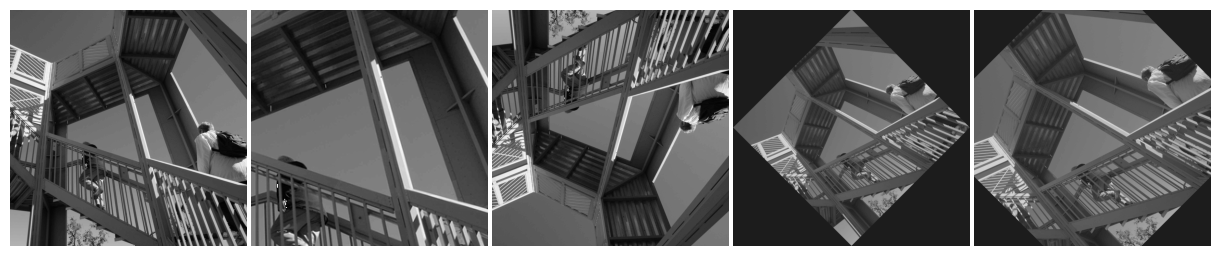

In [69]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

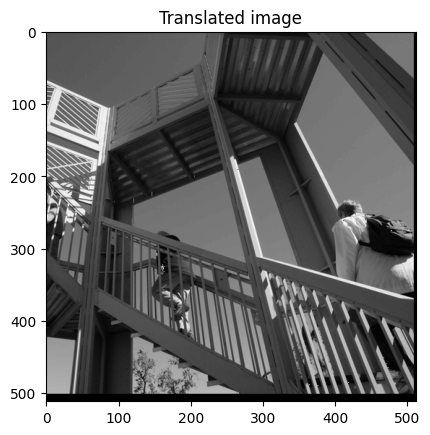

In [70]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

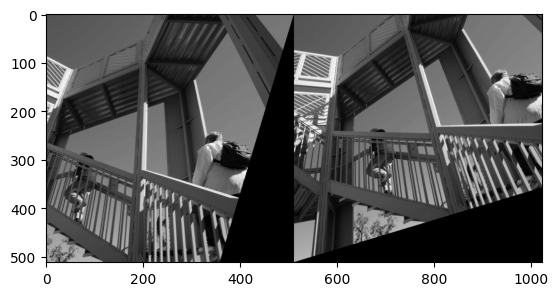

In [71]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [72]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x2aa5246ae10>

### Rescaling

In [73]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

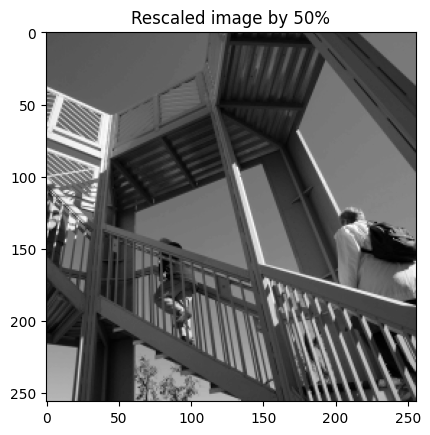

In [74]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

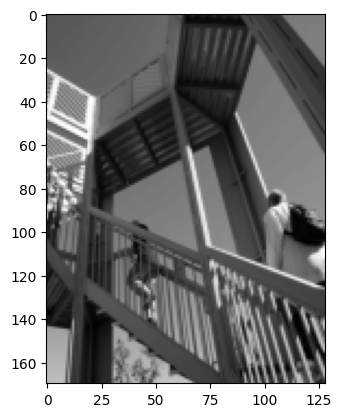

In [75]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [76]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

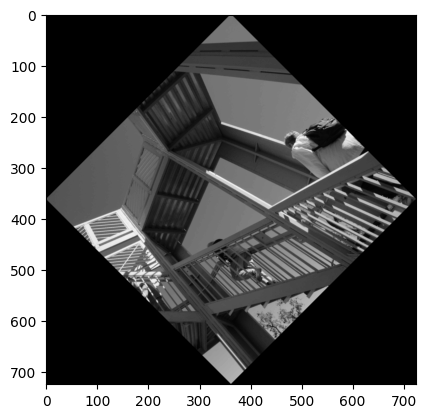

In [77]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


<Figure size 640x480 with 0 Axes>

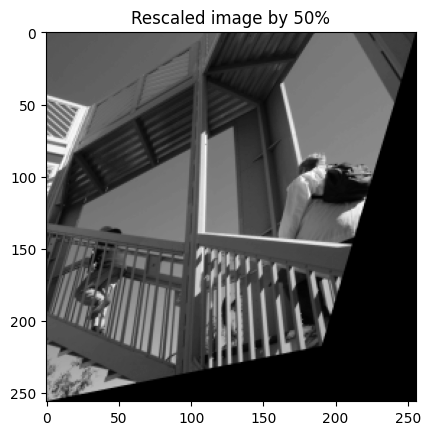

<Figure size 640x480 with 0 Axes>

In [78]:
# Leave your answer here
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0.2, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')

f_rescaled=transform.rescale(im1, 0.5, anti_aliasing=False)
imshow(f_rescaled, cmap='gray')
#imshow(np.hstack([im1]), cmap='gray')
plt.title("Rescaled image by 50%")

plt.figure()


Text(0.5, 1.0, 'Translated image')

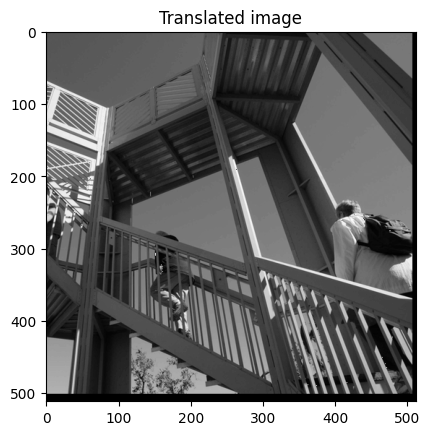

In [79]:
transl=np.array([[1,0,5],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

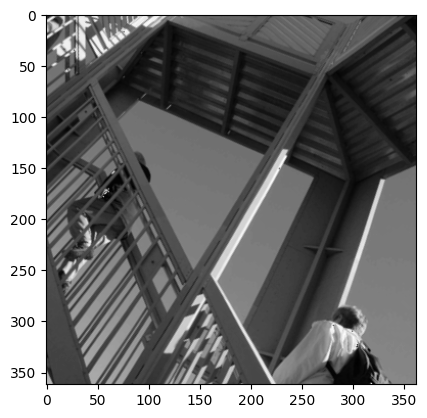

In [80]:
import math

tf=transform.rotate(f, -45, resize=True, mode='constant')
im=tf*255
f_rescaled=transform.rescale(im, 1.2, anti_aliasing=False)
lx, ly = im.shape
# Cropping
crop_f = im[lx // 4: - lx // 4, ly // 4: - ly // 4]
#subplot(1,2,2)
imshow(crop_f, cmap='gray')


### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

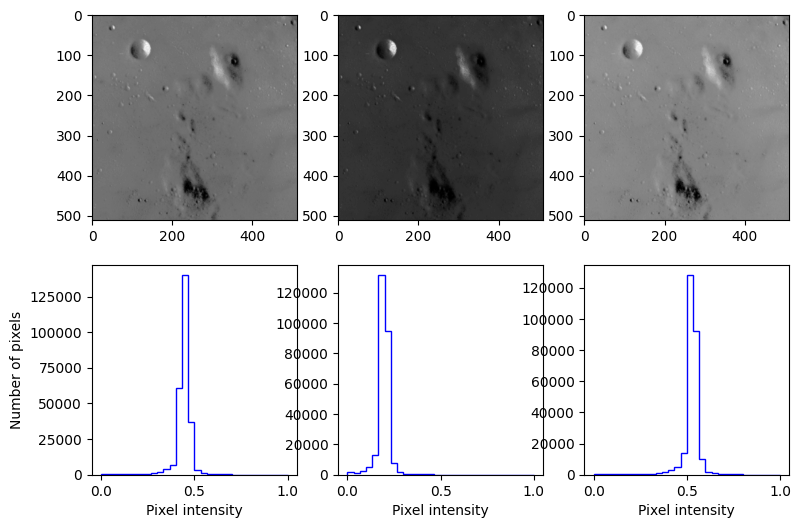

In [81]:
import numpy as np
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype= object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.Describe the effect of Gamma-correction on the distribution of pixel intensities.
- The image is brightened, the contrast is increased, and the distribution of pixel intensities is shifted toward the mid-range values when gamma correction is applied with a value of 2 in this code. It is a helpful approach for boosting low-contrast photographs or changing an image's overall appearance to make it more visually attractive.


2. How does logarithmic transformation improve the quality of an image?
- By boosting details in the image's darker areas, compressing high-intensity values, and making previously hidden details more obvious, logarithmic transformation enhances the quality of the image. It is a useful technique for improving photographs with difficult lighting or when it's important to bring out tiny details in the shadows.


3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


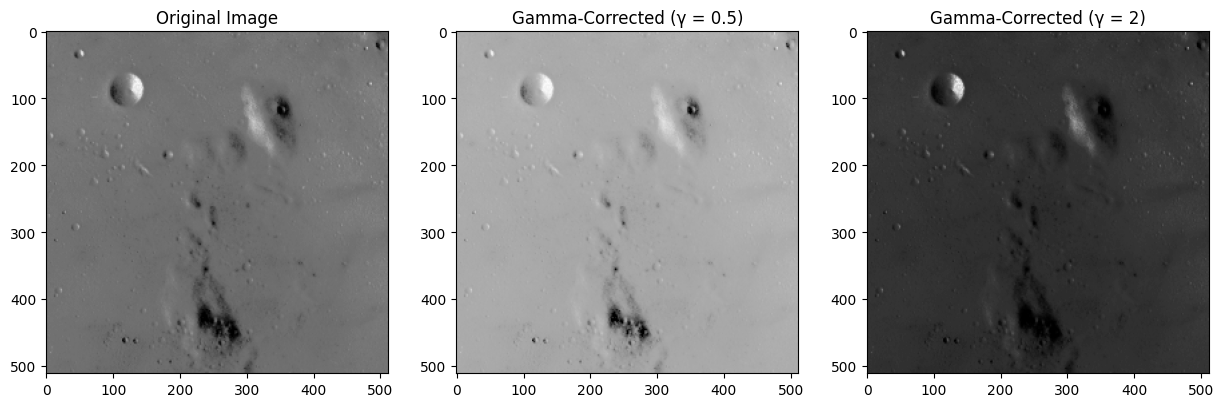

In [82]:
# Leave your answer here
import numpy as np
from skimage import data, img_as_float
from skimage import exposure
import matplotlib.pyplot as plt

#Load a low-contrast image
im = data.moon()
im = img_as_float(im)

#Gamma corrected with gamma < 1 (e.g., 0.5)
gamma_corrected_low = exposure.adjust_gamma(im, 0.5)

#Gamma corrected with gamma = 2 (as in the original code)
gamma_corrected_high = exposure.adjust_gamma(im, 2)

#Create subplots for displaying the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Display the original image
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Image')

#Display gamma-corrected image with gamma < 1
axes[1].imshow(gamma_corrected_low, cmap='gray')
axes[1].set_title('Gamma-Corrected (γ = 0.5)')

#Display gamma-corrected image with gamma = 2
axes[2].imshow(gamma_corrected_high, cmap='gray')
axes[2].set_title('Gamma-Corrected (γ = 2)')

plt.show()


Gamma transformations with values below one tend to lower contrast and provide the appearance of a flatter image. On the other hand, using a number greater than 1 (for example, = 2) improves sharpness and contrast in the image. Lower values reduce contrast, whereas higher values increase contrast, hence the choice of value depends on the intended outcome.